# Notebook for visualizing midterm results

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

## You can see here all the grades for each student (percent column). A nicer overview follows below.

In [2]:
file = '/Users/maltegueth/Documents/midterms_scores.csv'

questions = [str(x) for x in range(1,41)]

columns = ['student', 'percent', 'score', 'corrects', 'blanks', 'quiz_score'] + questions
data = pd.read_csv(file, sep=',', names=columns)

In [3]:
data[:10]

,student,percent,score,corrects,blanks,quiz_score,1,2,3,4,...,31,32,33,34,35,36,37,38,39,40
0,170003458,50,20,20,0,94.333333,A,C,A,D,...,A,A,D,C,A,C,C,B,C,D
1,180002226,55,22,22,0,61.000000,B,A,B,A,...,B,A,B,B,C,B,B,C,D,C
2,180006747,58,23,23,0,83.000000,A,A,A,A,...,A,B,C,B,A,B,B,D,D,D
3,179000933,63,25,25,0,88.666667,B,C,B,A,...,A,B,C,B,A,B,C,C,C,C
4,182007192,63,25,25,0,50.000000,B,D,A,A,...,A,B,C,B,A,B,B,C,A,B
5,172005907,63,25,25,0,88.666667,B,B,A,A,...,A,B,C,D,A,A,B,C,A,A
6,197001059,65,26,26,0,83.333333,B,C,A,A,...,A,B,C,B,A,B,A,A,D,C
7,190009075,70,28,28,0,72.000000,B,C,A,A,...,A,A,B,D,A,B,B,D,D,D
8,173002715,70,28,28,0,77.666667,B,C,A,C,...,A,B,C,B,D,A,B,C,A,D
9,175001097,75,30,30,0,83.000000,B,C,A,A,...,B,A,B,B,A,B,B,C,B,A


# Here are some basic stats for the percent grade in the dataframe (mean, median, sd)

In [4]:
data.percent.mean()

78.91891891891892

In [5]:
data.percent.median()

80.0

In [6]:
data.percent.std()

11.804844529020887

# Next, check some distributional plots to visualize how the class as a whole scored

In [7]:
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

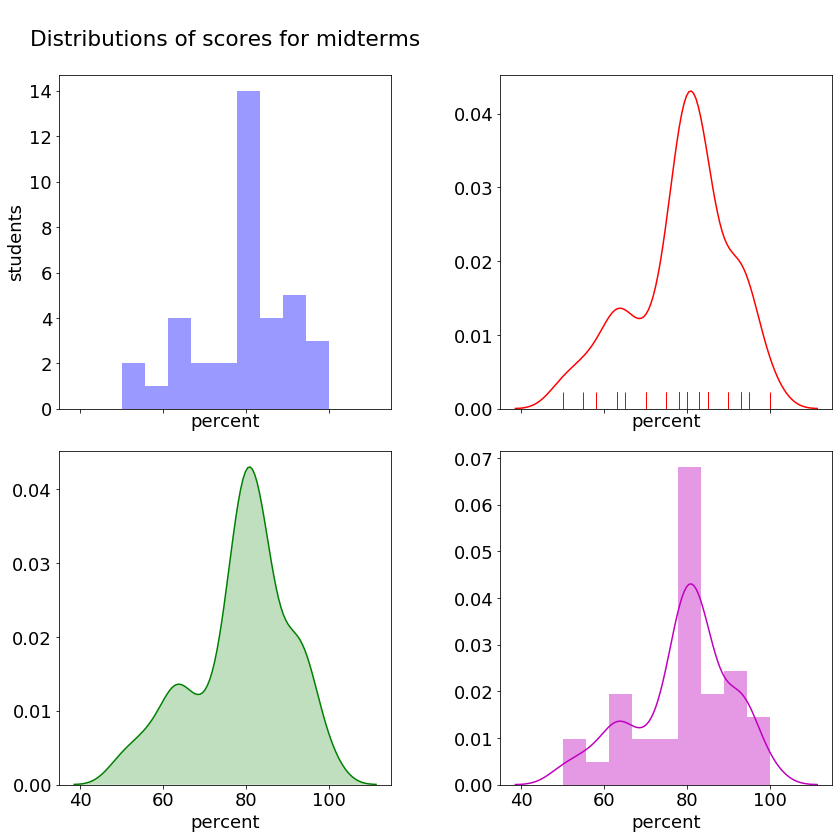

In [8]:
fig1, axes = matplotlib.pyplot.subplots(2, 2, figsize=(12, 12), sharex=True)

ax = sns.distplot(data['percent'], kde=False, color="b", ax=axes[0,0])
sns.distplot(data['percent'], hist=False, rug=True, color="r", ax=axes[0, 1])
sns.distplot(data['percent'], hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(data['percent'], color="m", ax=axes[1, 1])

ax.set(ylabel='students')
ax.set(title='\nDistributions of scores for midterms\n')
matplotlib.pyplot.tight_layout()

In [30]:
fig1.savefig('/Users/maltegueth/distributions_midterm_grades-1.tiff')

## Showing violin plots for all 40 questions is a little bit of a visual overhaul
## So I'm first showing you some question stats to identify the most critical ones

In [10]:
items = '/Users/maltegueth/items.csv'

cols = ['question', 'incorrect','section']
itemsData = pd.read_csv(items, sep=',', names=cols)
itemsData['incorrect'] = itemsData['incorrect']*100

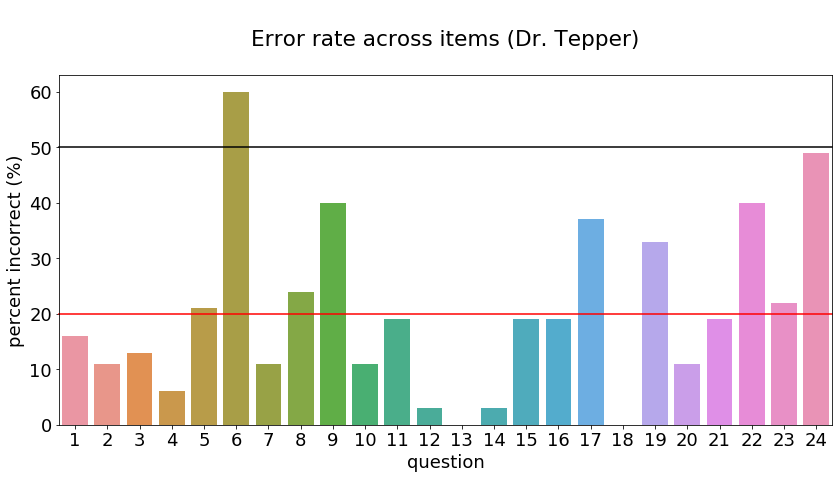

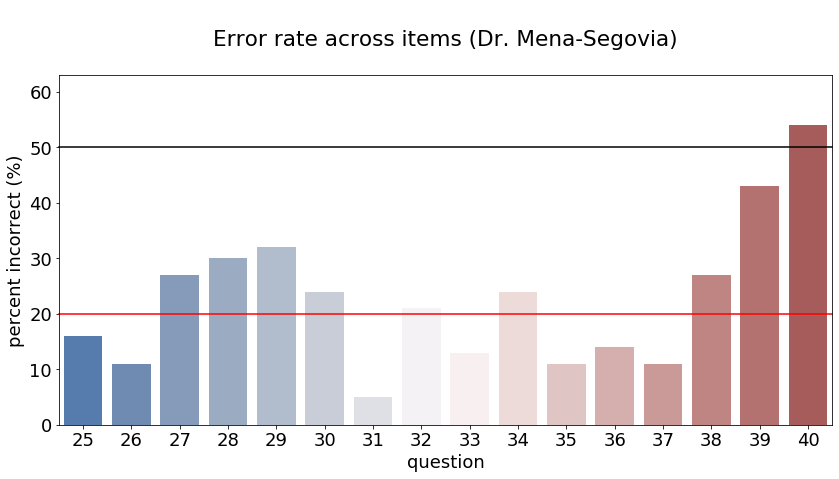

In [11]:
fig2, ax1 = plt.subplots(figsize=(12, 7), sharex=True)

sns.barplot(x='question', y='incorrect', data=itemsData[itemsData['section']==0], ax=ax1)

ax1.set(ylabel='percent incorrect (%)')
ax1.set(title='\nError rate across items (Dr. Tepper)\n')
ax1.axhline(50, color="k", clip_on=False)
ax1.axhline(20, color="r", clip_on=False)
matplotlib.pyplot.tight_layout()


fig3, ax2 = plt.subplots(figsize=(12, 7), sharex=True)

sns.barplot(x='question', y='incorrect', palette="vlag", data=itemsData[itemsData['section']==1], ax=ax2)

ax2.set(ylabel='percent incorrect (%)')
ax2.set(title='\nError rate across items (Dr. Mena-Segovia)\n')
ax2.axhline(50, color="k", clip_on=False)
ax2.axhline(20, color="r", clip_on=False)
ax2.set(ylim=[0, 63])
matplotlib.pyplot.tight_layout()

In [31]:
fig2.savefig('/Users/maltegueth/items_difficulty_tepper-2.tiff')

In [32]:
fig3.savefig('/Users/maltegueth/items_difficulty_mena-3.tiff')

### Here are the three questions either close or over the 50% line

In [16]:
mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}
data[questions] = data[questions].replace(mapping)

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

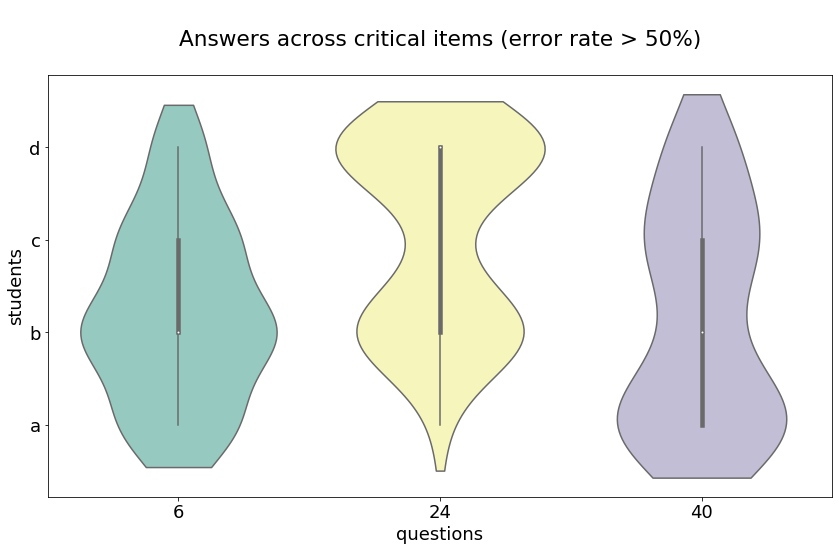

In [17]:
fig4, ax = matplotlib.pyplot.subplots(figsize=(12, 8), sharex=True)

ax = sns.violinplot(data=data.iloc[:,[11,29,45]], palette="Set3", cut=1)

ax.set(ylabel='students')
ax.set(xlabel='questions')
ax.set(yticklabels=['','a','b','c','d'])
ax.set(title='\nAnswers across critical items (error rate > 50%)\n')
matplotlib.pyplot.tight_layout()

In [33]:
fig4.savefig('/Users/maltegueth/critical_items-4.tiff')

### Seems to me that people just didn't know about the norepinephric system's functions and confused the locus coeruleus b) with all other answer options fairly equally

### For question 24 people seemed to have picked terminal boutons frequently, while the correct answer was d) spines

### Lastly, the same can be said for question 40 about brain machine interfaces. The correct answer a) was most frequently picked, but all others fairly equally

# Now, let's get to the overall grades only accounting for the midterm and the past quizzes 

# This will give us an idea of how many people are doing fantastic, how many are fine and how many are currently failing

Let's calculate the weighted grade for just the available scores weighting the midterm the same as it would be in relation to the quiz during the calculation of the final grade with the finals. With finals + midterms being weighted with 70% and the quizzes with 30%, that brings us to a 46% vs. 54% weighting for quiz and the midterm respectively.

We're excluding here two students who have not taken the midterm and are receiving a warning regardless.

In [22]:
data['weighted_grade'] = round(((data['quiz_score']*.46) + (data['percent']*.54)),0)
data[:10]

,student,percent,score,corrects,blanks,quiz_score,1,2,3,4,...,32,33,34,35,36,37,38,39,40,weighted_grade
0,170003458,50,20,20,0,94.333333,1,3,1,4,...,1,4,3,1,3.0,3,2,3,4,70.0
1,180002226,55,22,22,0,61.000000,2,1,2,1,...,1,2,2,3,2.0,2,3,4,3,58.0
2,180006747,58,23,23,0,83.000000,1,1,1,1,...,2,3,2,1,2.0,2,4,4,4,70.0
3,179000933,63,25,25,0,88.666667,2,3,2,1,...,2,3,2,1,2.0,3,3,3,3,75.0
4,182007192,63,25,25,0,50.000000,2,4,1,1,...,2,3,2,1,2.0,2,3,1,2,57.0
5,172005907,63,25,25,0,88.666667,2,2,1,1,...,2,3,4,1,1.0,2,3,1,1,75.0
6,197001059,65,26,26,0,83.333333,2,3,1,1,...,2,3,2,1,2.0,1,1,4,3,73.0
7,190009075,70,28,28,0,72.000000,2,3,1,1,...,1,2,4,1,2.0,2,4,4,4,71.0
8,173002715,70,28,28,0,77.666667,2,3,1,3,...,2,3,2,4,1.0,2,3,1,4,74.0
9,175001097,75,30,30,0,83.000000,2,3,1,1,...,1,2,2,1,2.0,2,3,2,1,79.0


## Here are the same plots and stats as before

In [23]:
data.weighted_grade.mean()

81.02702702702703

In [24]:
data.weighted_grade.median()

81.0

In [25]:
data.weighted_grade.std()

9.85868620525543

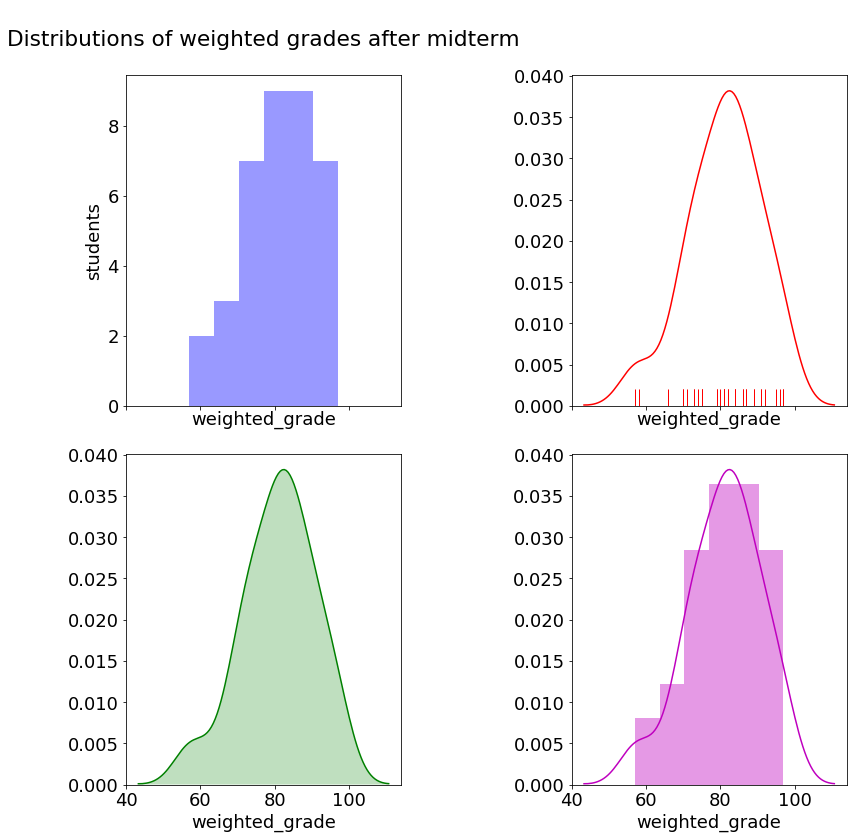

In [26]:
fig5, axes = matplotlib.pyplot.subplots(2, 2, figsize=(12, 12), sharex=True)

ax = sns.distplot(data['weighted_grade'], kde=False, color="b", ax=axes[0,0])
sns.distplot(data['weighted_grade'], hist=False, rug=True, color="r", ax=axes[0, 1])
sns.distplot(data['weighted_grade'], hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(data['weighted_grade'], color="m", ax=axes[1, 1])

ax.set(ylabel='students')
ax.set(title='\nDistributions of weighted grades after midterm\n')
matplotlib.pyplot.tight_layout()

In [34]:
fig5.savefig('/Users/maltegueth/distribtions_weighted_grades-5.tiff')

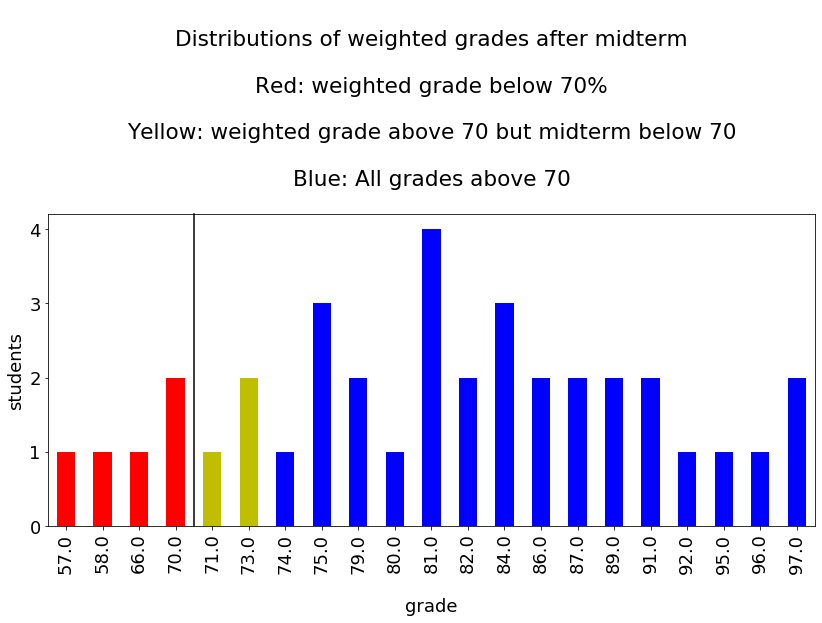

In [28]:
fig6, ax = matplotlib.pyplot.subplots(figsize=(12, 9), sharex=True)

colors = ['r','r','r','r','y','y','b','b','b','b','b','b','b',
         'b','b','b','b','b','b','b','b','b','b','b','b','b','b',
         'b','b','b','b','b']

data['weighted_grade'].value_counts().sort_index().plot(kind='bar', color=colors);

ax.set(ylabel='students')
ax.set(xlabel='\ngrade')
ax.set(title='\nDistributions of weighted grades after midterm\n\nRed: weighted grade below 70%\n\nYellow: weighted grade above 70 but midterm below 70\n\nBlue: All grades above 70\n')
ax.axvline(3.5, color="k", clip_on=False)
matplotlib.pyplot.tight_layout()

In [35]:
fig6.savefig('/Users/maltegueth/bar_plots_weighted_grades-6.tiff')